# Abstract

The former US president Donald Trump was notoriously active on Twitter. His tweets gathered cult like following both domestic and abroad. His ability to cultivate massive number of followers and engagement is impressive. Trump's twitter activity reflects escalating polarisation in the US political and societal discourse during the second decade of the 2000s. On 8th of January 2021, Twitter decided to permanently suspend his account, citing "the risk of further incitement of violence" following mob attack and occupation of US Capitol Building on 6th of January.

This project attempts to analyse how Trump tweets change over time.

In [1]:
#import the libraries needed and dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = 'data/trump_tweets.csv'
trump_tweets = pd.read_csv(data)

# 1. Exporatory Data Analysis

The data should be clean but it is always good to know what we are working with first.

In [2]:
trump_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56571 entries, 0 to 56570
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          56571 non-null  float64
 1   text        56571 non-null  object 
 2   is_retweet  56571 non-null  bool   
 3   is_deleted  56571 non-null  bool   
 4   device      56571 non-null  object 
 5   favorites   56571 non-null  int64  
 6   retweets    56571 non-null  int64  
 7   datetime    56571 non-null  object 
 8   is_flagged  56571 non-null  bool   
 9   date        56571 non-null  object 
dtypes: bool(3), float64(1), int64(2), object(4)
memory usage: 3.2+ MB


In [3]:
trump_tweets.isnull().sum() #check number of missing data

id            0
text          0
is_retweet    0
is_deleted    0
device        0
favorites     0
retweets      0
datetime      0
is_flagged    0
date          0
dtype: int64

Now we are sure that there is no missing data, we would do some basic data analysis.

In [4]:
trump_tweets.describe()

,id,favorites,retweets
count,5.657100e+04,5.657100e+04,56571.000000
mean,7.987865e+17,2.834955e+04,8618.987467
std,3.826616e+17,5.781564e+04,13306.132408
min,1.698309e+09,0.000000e+00,0.000000
25%,4.606192e+17,1.000000e+01,59.000000
50%,7.471024e+17,1.640000e+02,3450.000000
75%,1.193134e+18,4.393850e+04,13014.500000
max,1.347570e+18,1.869706e+06,408866.000000


In [5]:
trump_tweets.describe(include=['object'])

,text,device,datetime,date
count,56571,56571,56571,56571
unique,56118,20,56022,3500
top,MAKE AMERICA GREAT AGAIN!,Twitter for iPhone,2020-10-25T19:18:16Z,2015-01-05
freq,51,27967,8,160


In [6]:
trump_tweets.sort_values('datetime')

,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date
13325,1.698309e+09,Be sure to tune in and watch Donald Trump on L...,False,False,Twitter Web Client,939,519,2009-05-04T18:54:25Z,False,2009-05-04
13324,1.701461e+09,Donald Trump will be appearing on The View tom...,False,False,Twitter Web Client,259,34,2009-05-05T01:00:10Z,False,2009-05-05
13323,1.737480e+09,Donald Trump reads Top Ten Financial Tips on L...,False,False,Twitter Web Client,37,15,2009-05-08T13:38:08Z,False,2009-05-08
13322,1.741161e+09,New Blog Post: Celebrity Apprentice Finale and...,False,False,Twitter Web Client,29,11,2009-05-08T20:40:15Z,False,2009-05-08
13321,1.773561e+09,"""""""My persona will never be that of a wallflow...",False,False,Twitter Web Client,1877,1321,2009-05-12T14:07:28Z,False,2009-05-12
...,...,...,...,...,...,...,...,...,...,...
309,1.346929e+18,https://t.co/Pm2PKV0Fp3,False,False,Twitter for iPhone,0,0,2021-01-06T21:17:24Z,False,2021-01-06
311,1.346955e+18,These are the things and events that happen wh...,False,False,Twitter for iPhone,0,0,2021-01-06T23:01:04Z,False,2021-01-06
316,1.347335e+18,https://t.co/csX07ZVWGe,False,False,Twitter Media Studio,629326,154877,2021-01-08T00:10:24Z,False,2021-01-08
323,1.347555e+18,"The 75,000,000 great American Patriots who vot...",False,False,Twitter for iPhone,480997,108844,2021-01-08T14:46:38Z,False,2021-01-08


Our data start from 4th of May 2009 to the day of suspension 8th January 2021, spanning over 3500 days.

In [7]:
trump_tweets.sort_values(by=['favorites'], ascending=False)

,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date
11759,1.311892e+18,"Tonight, @FLOTUS and I tested positive for COV...",False,False,Twitter for iPhone,1869706,408866,2020-10-02T04:54:06Z,False,2020-10-02
11807,1.312234e+18,"Going welI, I think! Thank you to all. LOVE!!!",False,False,Twitter for iPhone,1219870,139605,2020-10-03T03:31:34Z,False,2020-10-03
2559,1.325100e+18,"I WON THIS ELECTION, BY A LOT!",False,False,Twitter for iPhone,1188311,190721,2020-11-07T15:36:36Z,True,2020-11-07
165,1.326159e+18,WE WILL WIN!,False,False,Twitter for iPhone,1023598,164891,2020-11-10T13:44:22Z,False,2020-11-10
2565,1.325195e+18,"71,000,000 Legal Votes. The most EVER for a si...",False,False,Twitter for iPhone,978022,157628,2020-11-07T21:54:48Z,False,2020-11-07
...,...,...,...,...,...,...,...,...,...,...
9432,1.295948e+18,RT @MrMichaelBurkes: Raise your hand if you'll...,True,False,Twitter for iPhone,0,21404,2020-08-19T04:57:43Z,False,2020-08-19
9431,1.295948e+18,RT @MrMichaelBurkes: If you support President ...,True,False,Twitter for iPhone,0,15613,2020-08-19T04:57:33Z,False,2020-08-19
9429,1.281450e+18,RT @ScottAdamsSays: Which side ignored this st...,True,False,Twitter for iPhone,0,12249,2020-07-10T04:46:05Z,False,2020-07-10
9428,1.261116e+18,RT @DailyCaller: We got no response from the @...,True,False,Twitter for iPhone,0,7113,2020-05-15T02:08:20Z,False,2020-05-15


In [8]:
#this appears to be the most popular tweet, with the highest number of favorites and retweets
display(trump_tweets.text.iloc[11759])

'Tonight, @FLOTUS and I tested positive for COVID-19. We will begin our quarantine and recovery process immediately. We will get through this TOGETHER!'

In [9]:
trump_tweets.is_retweet.value_counts()

False    46694
True      9877
Name: is_retweet, dtype: int64

In [10]:
trump_tweets.is_deleted.value_counts()

False    55479
True      1092
Name: is_deleted, dtype: int64

In [11]:
trump_tweets.device.value_counts()

Twitter for iPhone          27967
Twitter for Android         14545
Twitter Web Client          12182
TweetDeck                     482
TwitLonger Beta               405
Twitter Media Studio          375
Instagram                     133
Facebook                      105
Twitter for BlackBerry         97
Twitter Ads                    97
Twitter Web App                64
Twitter for iPad               60
Twitlonger                     23
Twitter QandA                  10
Vine - Make a Scene            10
Periscope                       7
Neatly For BlackBerry 10        5
Media Studio                    2
Twitter for Websites            1
Twitter Mirror for iPad         1
Name: device, dtype: int64

<AxesSubplot:ylabel='device'>

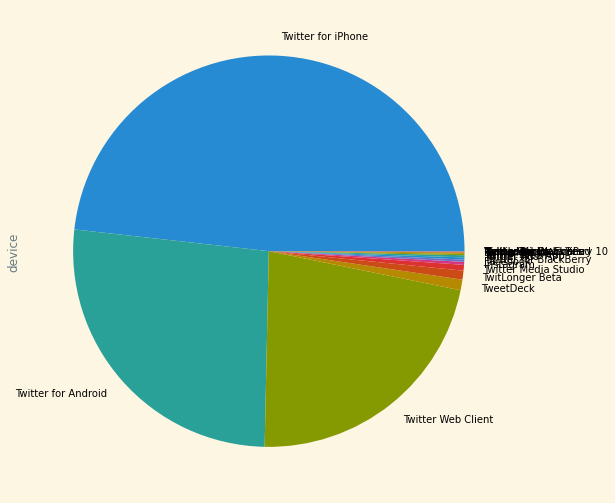

In [255]:
trump_tweets.device.value_counts().plot.pie()

In [12]:
trump_tweets.is_flagged.value_counts()

False    56267
True       304
Name: is_flagged, dtype: int64

In [13]:
trump_tweets.date.value_counts()

2015-01-05    160
2020-06-05    153
2020-01-22    144
2020-08-30    119
2015-01-06    118
             ... 
2009-05-14      1
2009-05-13      1
2010-03-05      1
2010-03-12      1
2010-02-07      1
Name: date, Length: 3500, dtype: int64

From these basic analysis, we know the number of tweets that are retweets, deleted or flagged. We also find that iPhone appear to be his most favourite device. More work need to be done to analyse the number of daily tweets. The huge numbers of daily tweets on some dates are really suprising. 

# 2. Text processing

In [14]:
import matplotlib.pyplot as plt
from datetime import datetime
from textblob import TextBlob
import os
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

Before we advance, let us clean up the text by removing RT, link, punctuation and convert them to lowercase

In [15]:
#Cleaning Text (RT, Punctuation etc), each process are coded separately in case some data don't need to be removed
tweets=trump_tweets.text
tweets = tweets.str.replace("RT @[A-Za-z0-9_]+:","", regex = True) #remove RT
#tweets = tweets.str.replace("@[A-Za-z0-9_]+","", regex = True) #remove mentions
tweets = tweets.str.replace("@+","", regex = True) #remove @, sometimes removing entire mention make the tweet lose it's meaning
#tweets = tweets.str.replace("#[A-Za-z0-9_]+","", regex = True) #remove hashtags
tweets = tweets.str.replace(r"http\S+","", regex = True) #remove https
tweets = tweets.str.replace(r"www.\S+","", regex = True) #remove www
trump_tweets["cleaned"] = tweets.str.lower() #lowercase tweets
trump_tweets[["text","is_retweet","cleaned"]].head(10)

,text,is_retweet,cleaned
0,Republicans and Democrats have both created ou...,False,republicans and democrats have both created ou...
1,I was thrilled to be back in the Great city of...,False,i was thrilled to be back in the great city of...
2,RT @CBS_Herridge: READ: Letter to surveillance...,True,read: letter to surveillance court obtained b...
3,The Unsolicited Mail In Ballot Scam is a major...,False,the unsolicited mail in ballot scam is a major...
4,RT @MZHemingway: Very friendly telling of even...,True,very friendly telling of events here about co...
5,RT @WhiteHouse: President @realDonaldTrump ann...,True,president realdonaldtrump announced historic ...
6,Getting a little exercise this morning! https:...,False,getting a little exercise this morning!
7,https://t.co/4qwCKQOiOw,False,
8,https://t.co/VlEu8yyovv,False,
9,https://t.co/z5CRqHO8vg,False,


The cleaned tweets look good enough. We would now start with sentiment analysis

# 3. Sentiment Analysis

Sentiment analysis is the task of determining emotional value of a given text in natural language. We are essentially giving each tweets a score based on words used, whether it carries positive or negative emotion. We might obtain interesting data from this. For example, the correlation between sentiment and interactions.



## TextBlob

TextBlob is a python library for NLP which offers various functions such as sentiment analysis and spelling correction. It returns two values for sentiment analysis, polarity [-1, 1] and subjectivity [0,1]. While it is handy, it ignores words that it doesn't know and sometimes returns unhelpful result like in example below.

## VADER

Valence aware dictionary for sentiment reasoning (VADER) is another popular sentiment analysis analyzer. It is also lexical based like TextBlob, however it gives different output. Vader returns the probability of input sentence to be either positive, negative or neutral.

In [36]:
#example of TextBlob giving useless output
TextBlob("I'm here to inform everyone here that I will leave my dorm and go to the local gas station to buy milk").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [17]:
#Sentiment analysis with TextBlob, the output are in the column 'polarity' and 'subjectivity'
trump_tweets[['polarity', 'subjectivity']] = trump_tweets['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [18]:
#VADER
#This part of the code takes a long time to load, get a coffee when running this.
for index, row in trump_tweets['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        trump_tweets.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        trump_tweets.loc[index, 'sentiment'] = 'positive'
    else:
        trump_tweets.loc[index, 'sentiment'] = 'neutral'
    trump_tweets.loc[index, 'neg'] = neg
    trump_tweets.loc[index, 'neu'] = neu
    trump_tweets.loc[index, 'pos'] = pos
    trump_tweets.loc[index, 'compound'] = comp
trump_tweets.head(10)

,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,9.845497e+16,Republicans and Democrats have both created ou...,False,False,TweetDeck,49,255,2011-08-02T18:07:48Z,False,2011-08-02,republicans and democrats have both created ou...,0.200000,0.200000,negative,0.231,0.598,0.171,-0.1779
1,1.234653e+18,I was thrilled to be back in the Great city of...,False,False,Twitter for iPhone,73748,17404,2020-03-03T01:34:50Z,False,2020-03-03,i was thrilled to be back in the great city of...,0.458929,0.483333,positive,0.000,0.545,0.455,0.9792
2,1.218011e+18,RT @CBS_Herridge: READ: Letter to surveillance...,True,False,Twitter for iPhone,0,7396,2020-01-17T03:22:47Z,False,2020-01-17,read: letter to surveillance court obtained b...,0.050000,0.300000,neutral,0.000,1.000,0.000,0.0000
3,1.304875e+18,The Unsolicited Mail In Ballot Scam is a major...,False,False,Twitter for iPhone,80527,23502,2020-09-12T20:10:58Z,False,2020-09-12,the unsolicited mail in ballot scam is a major...,0.021131,0.454762,negative,0.310,0.690,0.000,-0.9551
4,1.218160e+18,RT @MZHemingway: Very friendly telling of even...,True,False,Twitter for iPhone,0,9081,2020-01-17T13:13:59Z,False,2020-01-17,very friendly telling of events here about co...,0.268750,0.500000,positive,0.000,0.845,0.155,0.5413
5,1.217963e+18,RT @WhiteHouse: President @realDonaldTrump ann...,True,False,Twitter for iPhone,0,25048,2020-01-17T00:11:56Z,False,2020-01-17,president realdonaldtrump announced historic ...,0.095238,0.200794,positive,0.000,0.715,0.285,0.6360
6,1.223641e+18,Getting a little exercise this morning! https:...,False,False,Twitter for iPhone,285863,30209,2020-02-01T16:14:02Z,False,2020-02-01,getting a little exercise this morning!,-0.234375,0.500000,neutral,0.000,1.000,0.000,0.0000
7,1.319502e+18,https://t.co/4qwCKQOiOw,False,False,Twitter for iPhone,130822,19127,2020-10-23T04:52:14Z,False,2020-10-23,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000
8,1.319501e+18,https://t.co/VlEu8yyovv,False,False,Twitter for iPhone,153446,20275,2020-10-23T04:46:53Z,False,2020-10-23,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000
9,1.319501e+18,https://t.co/z5CRqHO8vg,False,False,Twitter for iPhone,102150,14815,2020-10-23T04:46:49Z,False,2020-10-23,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000


In [19]:
trump_tweets.sentiment.value_counts()

positive    29932
negative    14554
neutral     12085
Name: sentiment, dtype: int64

# 4. Time Series

In [20]:
from datetime import datetime

In [21]:
#Our datetime is in UTC, it would be prudent to convert it to Eastern Time Zone where his main residence is
#At the time I started working on this, I didn't know the time zone is formally known as Eastern Time Zone
trump_tweets.datetime

0        2011-08-02T18:07:48Z
1        2020-03-03T01:34:50Z
2        2020-01-17T03:22:47Z
3        2020-09-12T20:10:58Z
4        2020-01-17T13:13:59Z
                 ...         
56566    2020-10-23T03:46:25Z
56567    2020-10-23T03:42:05Z
56568    2020-10-23T01:03:58Z
56569    2020-10-22T21:04:21Z
56570    2020-10-22T18:31:46Z
Name: datetime, Length: 56571, dtype: object

In [22]:
trump_tweets['EST'] = pd.to_datetime(trump_tweets.datetime) 
trump_tweets['EST'] = trump_tweets['EST'].dt.tz_convert('US/Eastern')
trump_tweets.EST

0       2011-08-02 14:07:48-04:00
1       2020-03-02 20:34:50-05:00
2       2020-01-16 22:22:47-05:00
3       2020-09-12 16:10:58-04:00
4       2020-01-17 08:13:59-05:00
                   ...           
56566   2020-10-22 23:46:25-04:00
56567   2020-10-22 23:42:05-04:00
56568   2020-10-22 21:03:58-04:00
56569   2020-10-22 17:04:21-04:00
56570   2020-10-22 14:31:46-04:00
Name: EST, Length: 56571, dtype: datetime64[ns, US/Eastern]

In [58]:
trump_tweets['Date'] = pd.to_datetime(trump_tweets.EST.dt.date) #get Date in Eastern time

We would now start examining the data as time series. As we have data for over 3500 days, it would be impossible to have a good look in one huge graph. We could plot yearly subplot for daily data. To make it easier, we would write new dataframe with only the data we would plot the graph.

In [59]:
trump_tweets['Date']

0       2011-08-02
1       2020-03-02
2       2020-01-16
3       2020-09-12
4       2020-01-17
           ...    
56566   2020-10-22
56567   2020-10-22
56568   2020-10-22
56569   2020-10-22
56570   2020-10-22
Name: Date, Length: 56571, dtype: datetime64[ns]

In [60]:
trump_tweets.groupby('Date').size()

Date
2009-05-04     2
2009-05-08     2
2009-05-12     2
2009-05-13     1
2009-05-14     1
              ..
2021-01-04    18
2021-01-05    18
2021-01-06    22
2021-01-07     1
2021-01-08     2
Length: 3507, dtype: int64

In [103]:
tweet_frequency = pd.DataFrame(trump_tweets.groupby('Date').size(), columns = ['number of tweets'])
tweet_frequency

,number of tweets
Date,
2009-05-04,2
2009-05-08,2
2009-05-12,2
2009-05-13,1
2009-05-14,1
...,...
2021-01-04,18
2021-01-05,18
2021-01-06,22


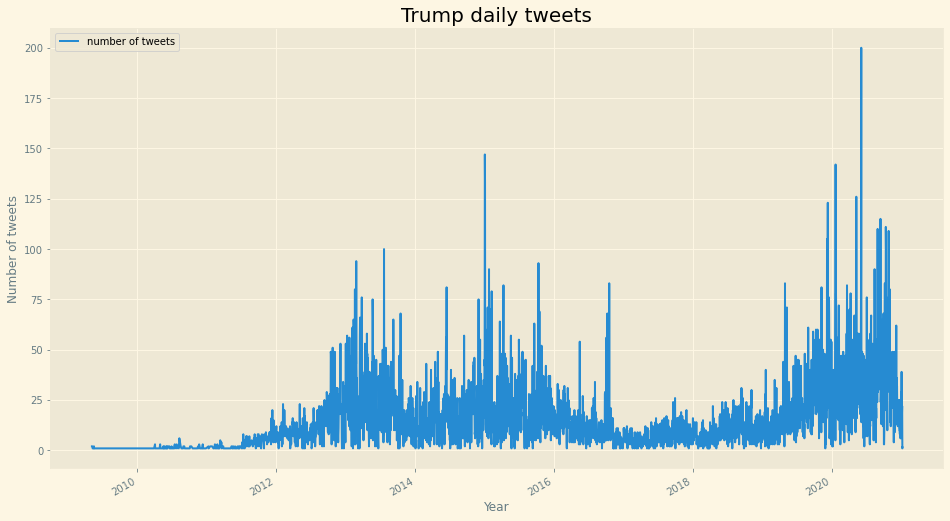

In [81]:
# Plot the data
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('Solarize_Light2')
ax = tweet_frequency.plot()
ax.set_title("Trump daily tweets", fontsize=20)
ax.set_xlabel("Year")
ax.set_ylabel("Number of tweets");

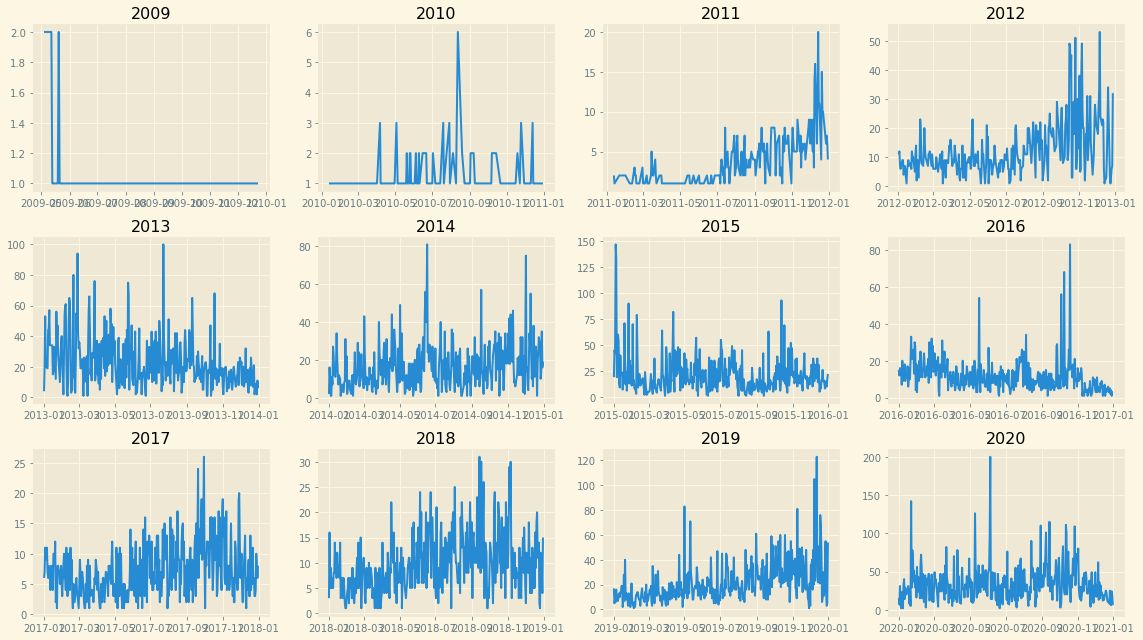

In [93]:
# Plot the data
fig, axs = plt.subplots(3, 4)
axs[0, 0].plot(tweet_frequency.loc['2009'])
axs[0, 0].set_title("2009")
axs[0, 1].plot(tweet_frequency.loc['2010'])
axs[0, 1].set_title("2010")
axs[0, 2].plot(tweet_frequency.loc['2011'])
axs[0, 2].set_title("2011")
axs[0, 3].plot(tweet_frequency.loc['2012'])
axs[0, 3].set_title("2012")
axs[1, 0].plot(tweet_frequency.loc['2013'])
axs[1, 0].set_title("2013")
axs[1, 1].plot(tweet_frequency.loc['2014'])
axs[1, 1].set_title("2014")
axs[1, 2].plot(tweet_frequency.loc['2015'])
axs[1, 2].set_title("2015")
axs[1, 3].plot(tweet_frequency.loc['2016'])
axs[1, 3].set_title("2016")
axs[2, 0].plot(tweet_frequency.loc['2017'])
axs[2, 0].set_title("2017")
axs[2, 1].plot(tweet_frequency.loc['2018'])
axs[2, 1].set_title("2018")
axs[2, 2].plot(tweet_frequency.loc['2019'])
axs[2, 2].set_title("2019")
axs[2, 3].plot(tweet_frequency.loc['2020'])
axs[2, 3].set_title("2020")

fig.tight_layout()

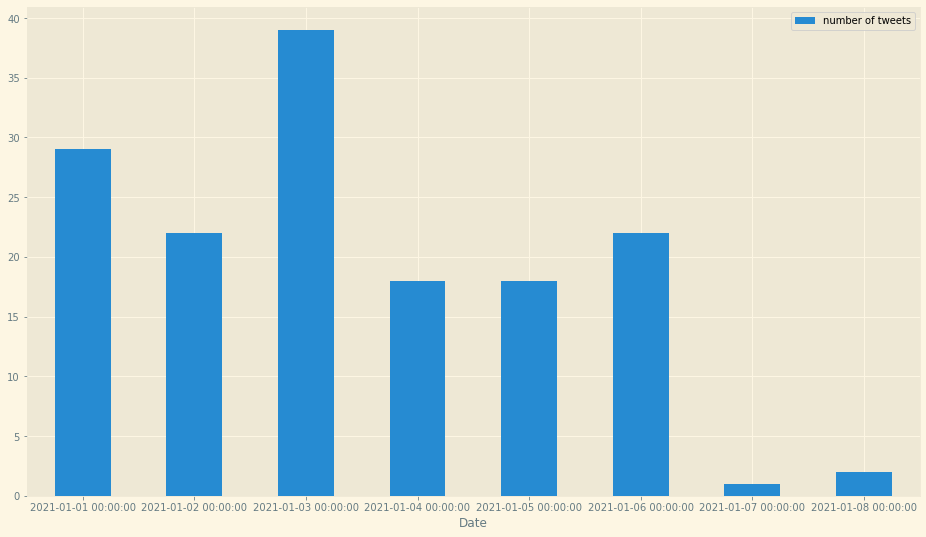

In [99]:
#Trump was suspended on 8th January, a daily bar chart give a better view of the data for the 8 days.
ax = tweet_frequency.loc['2021'].plot.bar(rot=0)

Tweet frequency peaked in 2020. This is likely because of election. 3rd January is National Write to Congress Day which explains the tweet frequency in 2021 as Trump contested election result.

In [104]:
tweet_sentiment = trump_tweets #make a copy of the dataframe

In [106]:
tweet_sentiment[tweet_sentiment['cleaned'] == ''] #these are the tweets that are hyperlinks and therefore empty

,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,EST,Date
7,1.319502e+18,https://t.co/4qwCKQOiOw,False,False,Twitter for iPhone,130822,19127,2020-10-23T04:52:14Z,False,2020-10-23,,0.0,0.0,neutral,0.0,0.0,0.0,0.0,2020-10-23 00:52:14-04:00,2020-10-23
8,1.319501e+18,https://t.co/VlEu8yyovv,False,False,Twitter for iPhone,153446,20275,2020-10-23T04:46:53Z,False,2020-10-23,,0.0,0.0,neutral,0.0,0.0,0.0,0.0,2020-10-23 00:46:53-04:00,2020-10-23
9,1.319501e+18,https://t.co/z5CRqHO8vg,False,False,Twitter for iPhone,102150,14815,2020-10-23T04:46:49Z,False,2020-10-23,,0.0,0.0,neutral,0.0,0.0,0.0,0.0,2020-10-23 00:46:49-04:00,2020-10-23
10,1.319500e+18,https://t.co/TQCQiDrVOB,False,False,Twitter for iPhone,255804,35594,2020-10-23T04:46:45Z,False,2020-10-23,,0.0,0.0,neutral,0.0,0.0,0.0,0.0,2020-10-23 00:46:45-04:00,2020-10-23
18,1.345959e+18,https://t.co/NmdLNsfDU2,False,False,Twitter for iPhone,95300,28318,2021-01-04T05:02:51Z,False,2021-01-04,,0.0,0.0,neutral,0.0,0.0,0.0,0.0,2021-01-04 00:02:51-05:00,2021-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56425,1.084153e+18,https://t.co/3IH1yW2eTg,False,False,Twitter for iPhone,91664,21783,2019-01-12T18:20:13Z,False,2019-01-12,,0.0,0.0,neutral,0.0,0.0,0.0,0.0,2019-01-12 13:20:13-05:00,2019-01-12
56471,1.082823e+18,https://t.co/Ft6FqQmYfI,False,False,Twitter for iPhone,128589,31456,2019-01-09T02:16:29Z,False,2019-01-09,,0.0,0.0,neutral,0.0,0.0,0.0,0.0,2019-01-08 21:16:29-05:00,2019-01-08
56509,1.080923e+18,https://t.co/jsOrDtwdEa,False,False,Twitter Media Studio,104658,34605,2019-01-03T20:25:18Z,False,2019-01-03,,0.0,0.0,neutral,0.0,0.0,0.0,0.0,2019-01-03 15:25:18-05:00,2019-01-03
56511,1.080859e+18,https://t.co/JzfXMAPwKP,False,False,Twitter for iPhone,174438,43163,2019-01-03T16:10:31Z,False,2019-01-03,,0.0,0.0,neutral,0.0,0.0,0.0,0.0,2019-01-03 11:10:31-05:00,2019-01-03


In [142]:
#We would now remove these tweets so they wouldn't affect analysis of sentiment values.
nan_value = float("NaN")
tweet_sentiment.replace("", nan_value, inplace=True)
tweet_sentiment.replace(" ", nan_value, inplace=True)
tweet_sentiment.dropna(subset = ["cleaned"], inplace=True)
tweet_sentiment.head(10)

,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,EST,Date
0,9.845497e+16,Republicans and Democrats have both created ou...,False,False,TweetDeck,49,255,2011-08-02T18:07:48Z,False,2011-08-02,republicans and democrats have both created ou...,0.200000,0.200000,negative,0.231,0.598,0.171,-0.1779,2011-08-02 14:07:48-04:00,2011-08-02
1,1.234653e+18,I was thrilled to be back in the Great city of...,False,False,Twitter for iPhone,73748,17404,2020-03-03T01:34:50Z,False,2020-03-03,i was thrilled to be back in the great city of...,0.458929,0.483333,positive,0.000,0.545,0.455,0.9792,2020-03-02 20:34:50-05:00,2020-03-02
2,1.218011e+18,RT @CBS_Herridge: READ: Letter to surveillance...,True,False,Twitter for iPhone,0,7396,2020-01-17T03:22:47Z,False,2020-01-17,read: letter to surveillance court obtained b...,0.050000,0.300000,neutral,0.000,1.000,0.000,0.0000,2020-01-16 22:22:47-05:00,2020-01-16
3,1.304875e+18,The Unsolicited Mail In Ballot Scam is a major...,False,False,Twitter for iPhone,80527,23502,2020-09-12T20:10:58Z,False,2020-09-12,the unsolicited mail in ballot scam is a major...,0.021131,0.454762,negative,0.310,0.690,0.000,-0.9551,2020-09-12 16:10:58-04:00,2020-09-12
4,1.218160e+18,RT @MZHemingway: Very friendly telling of even...,True,False,Twitter for iPhone,0,9081,2020-01-17T13:13:59Z,False,2020-01-17,very friendly telling of events here about co...,0.268750,0.500000,positive,0.000,0.845,0.155,0.5413,2020-01-17 08:13:59-05:00,2020-01-17
5,1.217963e+18,RT @WhiteHouse: President @realDonaldTrump ann...,True,False,Twitter for iPhone,0,25048,2020-01-17T00:11:56Z,False,2020-01-17,president realdonaldtrump announced historic ...,0.095238,0.200794,positive,0.000,0.715,0.285,0.6360,2020-01-16 19:11:56-05:00,2020-01-16
6,1.223641e+18,Getting a little exercise this morning! https:...,False,False,Twitter for iPhone,285863,30209,2020-02-01T16:14:02Z,False,2020-02-01,getting a little exercise this morning!,-0.234375,0.500000,neutral,0.000,1.000,0.000,0.0000,2020-02-01 11:14:02-05:00,2020-02-01
12,1.236502e+18,RT @GOPChairwoman: The economic boom continues...,True,False,Twitter for iPhone,0,8681,2020-03-08T04:01:46Z,False,2020-03-08,the economic boom continues!\n\n273k jobs add...,0.250000,0.200000,neutral,0.000,1.000,0.000,0.0000,2020-03-07 23:01:46-05:00,2020-03-07
13,1.225835e+18,RT @TomFitton: Vindman's behavior is a scandal...,True,False,Twitter for iPhone,0,7679,2020-02-07T17:35:20Z,False,2020-02-07,vindman's behavior is a scandal. he should be...,-0.062500,0.062500,negative,0.129,0.756,0.116,-0.0772,2020-02-07 12:35:20-05:00,2020-02-07
14,1.215248e+18,Thank you Elise! https://t.co/Y4Hb0zf5jk,False,False,Twitter for iPhone,48510,11608,2020-01-09T12:24:31Z,False,2020-01-09,thank you elise!,0.000000,0.000000,positive,0.000,0.417,0.583,0.4199,2020-01-09 07:24:31-05:00,2020-01-09


In [144]:
display(tweet_sentiment.cleaned.iloc[9])

'thank you elise! '

In [146]:
tweet_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55027 entries, 0 to 56570
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype                     
---  ------        --------------  -----                     
 0   id            55027 non-null  float64                   
 1   text          55027 non-null  object                    
 2   is_retweet    55027 non-null  bool                      
 3   is_deleted    55027 non-null  bool                      
 4   device        55027 non-null  object                    
 5   favorites     55027 non-null  int64                     
 6   retweets      55027 non-null  int64                     
 7   datetime      55027 non-null  object                    
 8   is_flagged    55027 non-null  bool                      
 9   date          55027 non-null  object                    
 10  cleaned       55027 non-null  object                    
 11  polarity      55027 non-null  float64                   
 12  subjectivity  5502

In [203]:
tweet_score = pd.DataFrame(tweet_sentiment.groupby([tweet_sentiment["Date"]])["polarity","subjectivity", "neg","neu","pos","compound"].mean(), columns = ["polarity","subjectivity", "neg","neu","pos","compound"])
tweet_score

C:\Users\fullb\AppData\Local\Temp/ipykernel_23184/3046344699.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tweet_score = pd.DataFrame(tweet_sentiment.groupby([tweet_sentiment["Date"]])["polarity","subjectivity", "neg","neu","pos","compound"].mean(), columns = ["polarity","subjectivity", "neg","neu","pos","compound"])


,polarity,subjectivity,neg,neu,pos,compound
Date,,,,,,
2009-05-04,0.172727,0.475884,0.000000,0.783500,0.216500,0.648350
2009-05-08,0.128807,0.437273,0.000000,0.855500,0.144500,0.323400
2009-05-12,0.000000,0.000000,0.039000,0.890000,0.071000,0.161750
2009-05-13,0.136364,0.454545,0.000000,0.652000,0.348000,0.750600
2009-05-14,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...
2021-01-03,0.134269,0.367984,0.064273,0.825424,0.110303,0.096097
2021-01-04,0.031134,0.250860,0.035000,0.880714,0.084000,0.138471
2021-01-05,0.123108,0.294292,0.053222,0.834056,0.112722,0.176050


In [207]:
tweet_score_TextBlob = pd.DataFrame(tweet_sentiment.groupby([tweet_sentiment["Date"]])["polarity","subjectivity"].mean(), columns = ["polarity","subjectivity"])
tweet_score_TextBlob

C:\Users\fullb\AppData\Local\Temp/ipykernel_23184/607950526.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tweet_score_TextBlob = pd.DataFrame(tweet_sentiment.groupby([tweet_sentiment["Date"]])["polarity","subjectivity"].mean(), columns = ["polarity","subjectivity"])


,polarity,subjectivity
Date,,
2009-05-04,0.172727,0.475884
2009-05-08,0.128807,0.437273
2009-05-12,0.000000,0.000000
2009-05-13,0.136364,0.454545
2009-05-14,0.000000,0.000000
...,...,...
2021-01-03,0.134269,0.367984
2021-01-04,0.031134,0.250860
2021-01-05,0.123108,0.294292


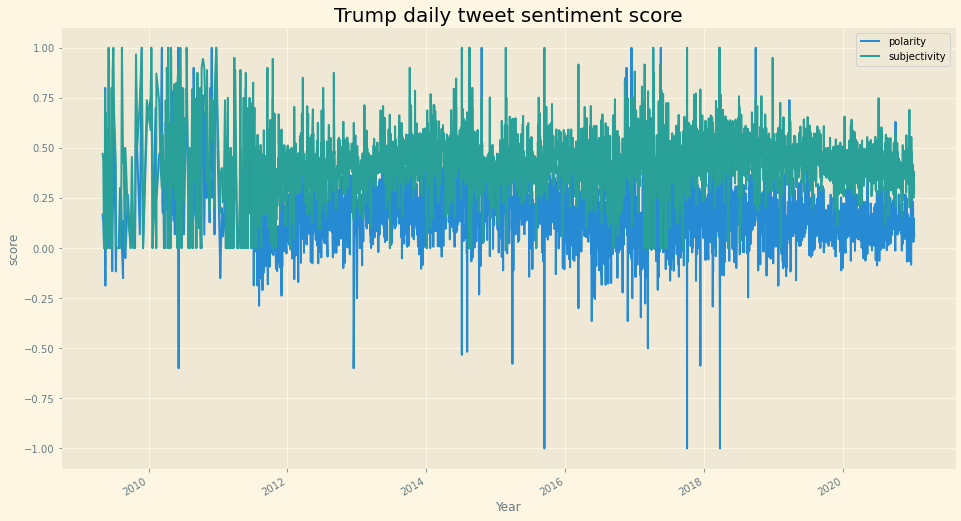

In [209]:
# Plot the data
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('Solarize_Light2')
ax = tweet_score_TextBlob.plot()
ax.set_title("Trump daily tweet sentiment score", fontsize=20)
ax.set_xlabel("Year")
ax.set_ylabel("score");

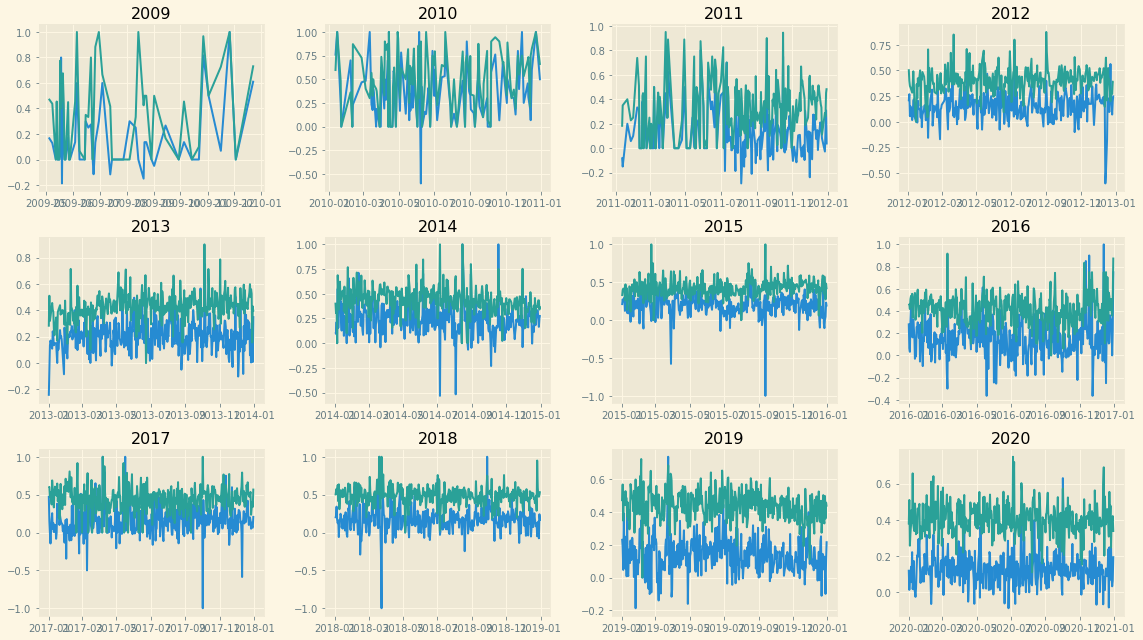

In [212]:
# Plot the data
fig, axs = plt.subplots(3, 4)
axs[0, 0].plot(tweet_score_TextBlob.loc['2009'])
axs[0, 0].set_title("2009")
axs[0, 1].plot(tweet_score_TextBlob.loc['2010'])
axs[0, 1].set_title("2010")
axs[0, 2].plot(tweet_score_TextBlob.loc['2011'])
axs[0, 2].set_title("2011")
axs[0, 3].plot(tweet_score_TextBlob.loc['2012'])
axs[0, 3].set_title("2012")
axs[1, 0].plot(tweet_score_TextBlob.loc['2013'])
axs[1, 0].set_title("2013")
axs[1, 1].plot(tweet_score_TextBlob.loc['2014'])
axs[1, 1].set_title("2014")
axs[1, 2].plot(tweet_score_TextBlob.loc['2015'])
axs[1, 2].set_title("2015")
axs[1, 3].plot(tweet_score_TextBlob.loc['2016'])
axs[1, 3].set_title("2016")
axs[2, 0].plot(tweet_score_TextBlob.loc['2017'])
axs[2, 0].set_title("2017")
axs[2, 1].plot(tweet_score_TextBlob.loc['2018'])
axs[2, 1].set_title("2018")
axs[2, 2].plot(tweet_score_TextBlob.loc['2019'])
axs[2, 2].set_title("2019")
axs[2, 3].plot(tweet_score_TextBlob.loc['2020'])
axs[2, 3].set_title("2020")

fig.tight_layout()

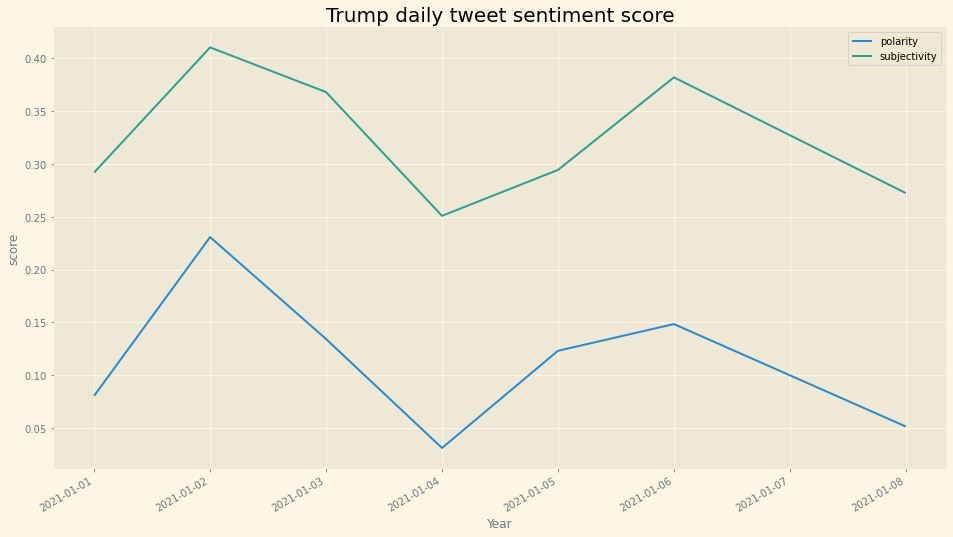

In [219]:
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('Solarize_Light2')
ax = tweet_score_TextBlob.loc['2021'].plot()
ax.set_title("Trump daily tweet sentiment score", fontsize=20)
ax.set_xlabel("Year")
ax.set_ylabel("score");

In [220]:
tweet_score_VADER = pd.DataFrame(tweet_sentiment.groupby([tweet_sentiment["Date"]])["neg","neu","pos","compound"].mean(), columns = ["neg","neu","pos","compound"])
tweet_score_VADER

C:\Users\fullb\AppData\Local\Temp/ipykernel_23184/2527679066.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tweet_score_VADER = pd.DataFrame(tweet_sentiment.groupby([tweet_sentiment["Date"]])["neg","neu","pos","compound"].mean(), columns = ["neg","neu","pos","compound"])


,neg,neu,pos,compound
Date,,,,
2009-05-04,0.000000,0.783500,0.216500,0.648350
2009-05-08,0.000000,0.855500,0.144500,0.323400
2009-05-12,0.039000,0.890000,0.071000,0.161750
2009-05-13,0.000000,0.652000,0.348000,0.750600
2009-05-14,0.000000,1.000000,0.000000,0.000000
...,...,...,...,...
2021-01-03,0.064273,0.825424,0.110303,0.096097
2021-01-04,0.035000,0.880714,0.084000,0.138471
2021-01-05,0.053222,0.834056,0.112722,0.176050


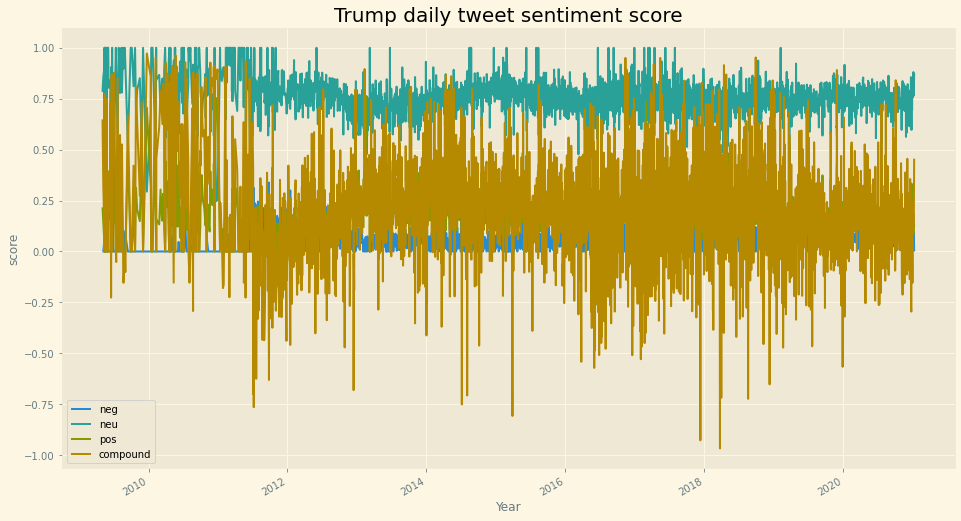

In [221]:
# Plot the data
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('Solarize_Light2')
ax = tweet_score_VADER.plot()
ax.set_title("Trump daily tweet sentiment score", fontsize=20)
ax.set_xlabel("Year")
ax.set_ylabel("score");

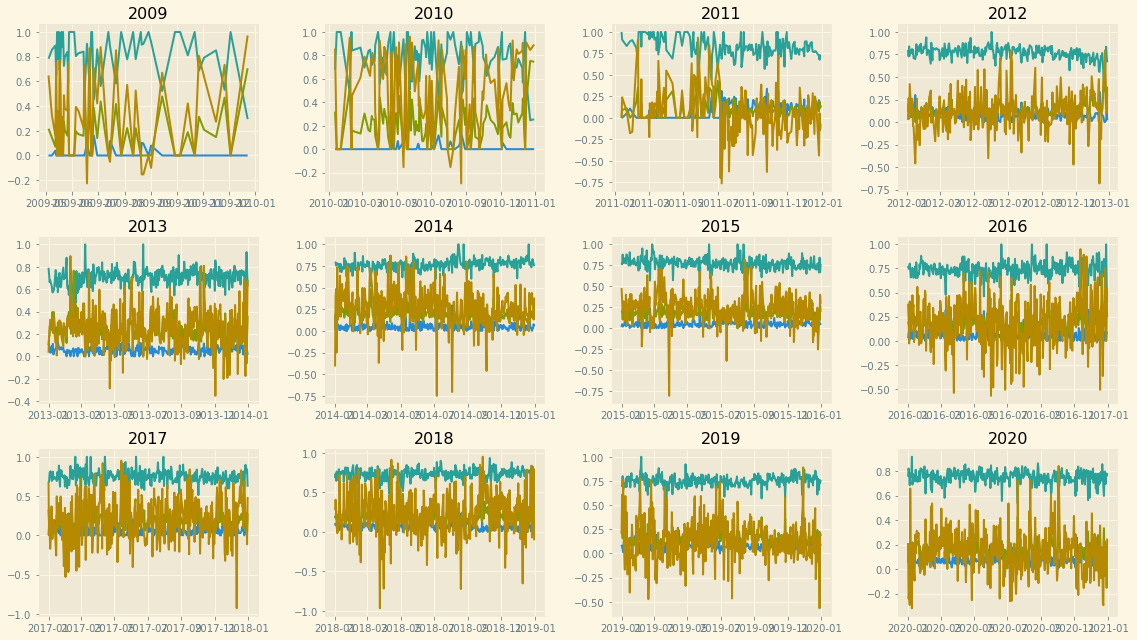

In [222]:
# Plot the data
fig, axs = plt.subplots(3, 4)
axs[0, 0].plot(tweet_score_VADER.loc['2009'])
axs[0, 0].set_title("2009")
axs[0, 1].plot(tweet_score_VADER.loc['2010'])
axs[0, 1].set_title("2010")
axs[0, 2].plot(tweet_score_VADER.loc['2011'])
axs[0, 2].set_title("2011")
axs[0, 3].plot(tweet_score_VADER.loc['2012'])
axs[0, 3].set_title("2012")
axs[1, 0].plot(tweet_score_VADER.loc['2013'])
axs[1, 0].set_title("2013")
axs[1, 1].plot(tweet_score_VADER.loc['2014'])
axs[1, 1].set_title("2014")
axs[1, 2].plot(tweet_score_VADER.loc['2015'])
axs[1, 2].set_title("2015")
axs[1, 3].plot(tweet_score_VADER.loc['2016'])
axs[1, 3].set_title("2016")
axs[2, 0].plot(tweet_score_VADER.loc['2017'])
axs[2, 0].set_title("2017")
axs[2, 1].plot(tweet_score_VADER.loc['2018'])
axs[2, 1].set_title("2018")
axs[2, 2].plot(tweet_score_VADER.loc['2019'])
axs[2, 2].set_title("2019")
axs[2, 3].plot(tweet_score_VADER.loc['2020'])
axs[2, 3].set_title("2020")

fig.tight_layout()

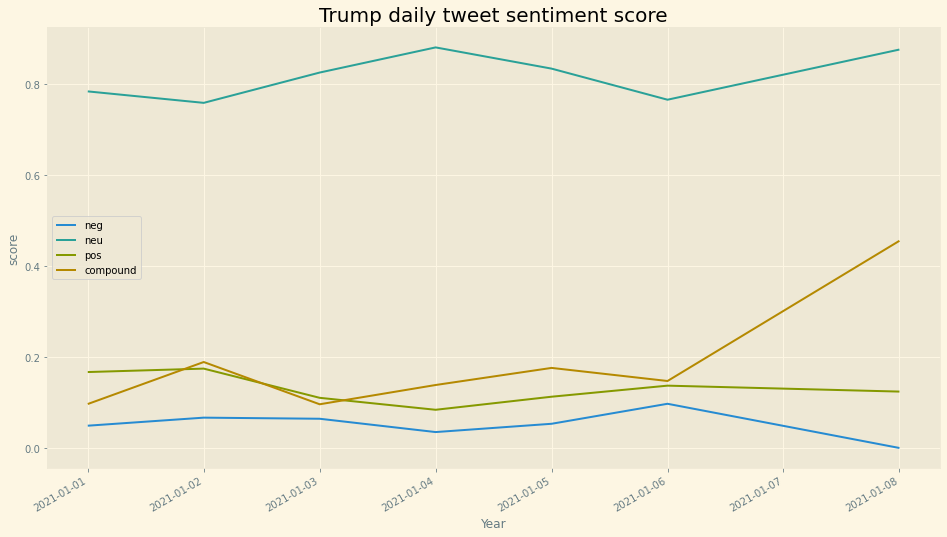

In [223]:
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('Solarize_Light2')
ax = tweet_score_VADER.loc['2021'].plot()
ax.set_title("Trump daily tweet sentiment score", fontsize=20)
ax.set_xlabel("Year")
ax.set_ylabel("score");

In general, the tweets are mostly neutral. Perhaps it is worth to analyze the score between iphone and android. It is common for public figures to have PR team. Looking at the distribution of tweets, it likely that Trump personally use an android device posting his tweets.

In [225]:
tweet_score_iPhone_VADER = tweet_sentiment.loc[tweet_sentiment['device'] == 'Twitter for iPhone']
tweet_score_iPhone_VADER = pd.DataFrame(tweet_score_iPhone_VADER.groupby([tweet_score_iPhone_VADER["Date"]])["neg","neu","pos","compound"].mean(), columns = ["neg","neu","pos","compound"])
tweet_score_iPhone_VADER

C:\Users\fullb\AppData\Local\Temp/ipykernel_23184/3359557197.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tweet_score_iPhone_VADER = pd.DataFrame(tweet_score_iPhone_VADER.groupby([tweet_score_iPhone_VADER["Date"]])["neg","neu","pos","compound"].mean(), columns = ["neg","neu","pos","compound"])


,neg,neu,pos,compound
Date,,,,
2012-12-10,0.000000,0.629000,0.371000,0.709600
2013-02-24,0.000000,0.880000,0.120000,0.457400
2013-03-10,0.000000,1.000000,0.000000,0.000000
2013-03-30,0.132000,0.868000,0.000000,-0.541100
2013-05-01,0.103000,0.728500,0.168500,0.142300
...,...,...,...,...
2021-01-03,0.064273,0.825424,0.110303,0.096097
2021-01-04,0.035000,0.880714,0.084000,0.138471
2021-01-05,0.053222,0.834056,0.112722,0.176050


In [226]:
tweet_score_Android_VADER = tweet_sentiment.loc[tweet_sentiment['device'] == 'Twitter for Android']
tweet_score_Android_VADER = pd.DataFrame(tweet_score_Android_VADER.groupby([tweet_score_Android_VADER["Date"]])["neg","neu","pos","compound"].mean(), columns = ["neg","neu","pos","compound"])
tweet_score_Android_VADER

C:\Users\fullb\AppData\Local\Temp/ipykernel_23184/3455924557.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tweet_score_Android_VADER = pd.DataFrame(tweet_score_Android_VADER.groupby([tweet_score_Android_VADER["Date"]])["neg","neu","pos","compound"].mean(), columns = ["neg","neu","pos","compound"])


,neg,neu,pos,compound
Date,,,,
2013-02-05,0.000000,0.468000,0.532000,0.843900
2013-02-14,0.000000,0.256000,0.744000,0.440400
2013-02-15,0.000000,0.256000,0.744000,0.440400
2013-02-16,0.000000,0.236000,0.764000,0.501900
2013-02-18,0.039600,0.487000,0.473400,0.211400
...,...,...,...,...
2017-03-04,0.074714,0.851571,0.073714,-0.009414
2017-03-05,0.077500,0.876500,0.046000,-0.116250
2017-03-07,0.120167,0.745833,0.134000,0.118200


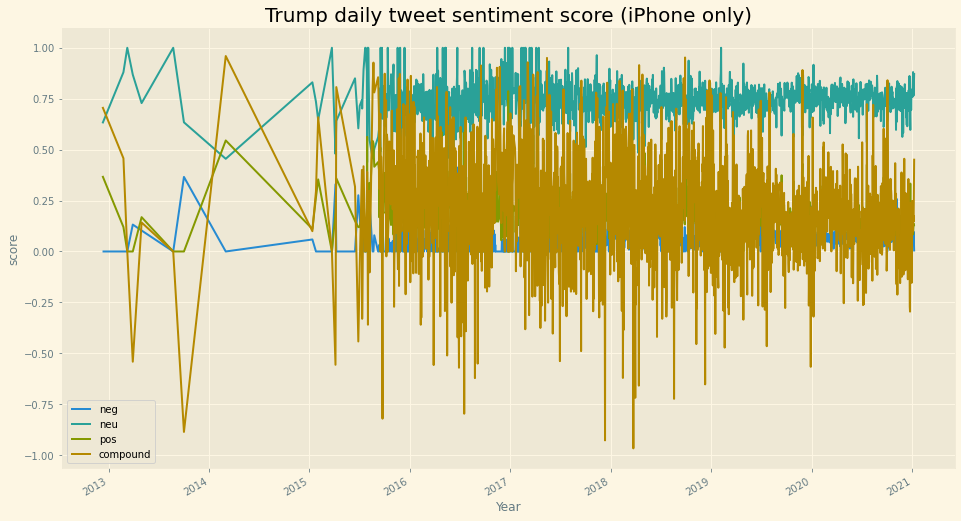

In [227]:
# Plot the data
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('Solarize_Light2')
ax = tweet_score_iPhone_VADER.plot()
ax.set_title("Trump daily tweet sentiment score (iPhone only)", fontsize=20)
ax.set_xlabel("Year")
ax.set_ylabel("score");

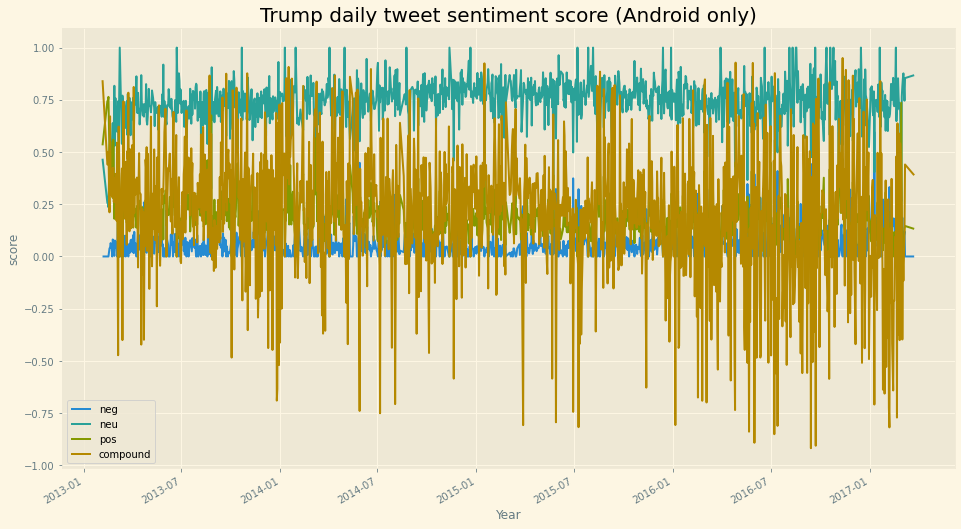

In [228]:
# Plot the data
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('Solarize_Light2')
ax = tweet_score_Android_VADER.plot()
ax.set_title("Trump daily tweet sentiment score (Android only)", fontsize=20)
ax.set_xlabel("Year")
ax.set_ylabel("score");

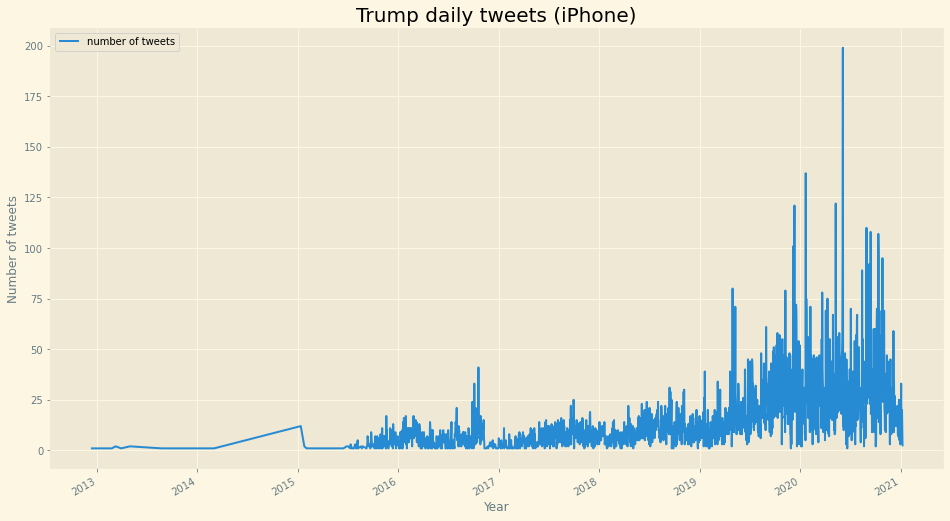

In [253]:
tweet_frequency_iPhone = pd.DataFrame(trump_tweets.loc[trump_tweets['device'] == 'Twitter for iPhone'].groupby('Date').size(), columns = ['number of tweets'])
# Plot the data
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('Solarize_Light2')
ax = tweet_frequency_iPhone.plot()
ax.set_title("Trump daily tweets (iPhone)", fontsize=20)
ax.set_xlabel("Year")
ax.set_ylabel("Number of tweets");

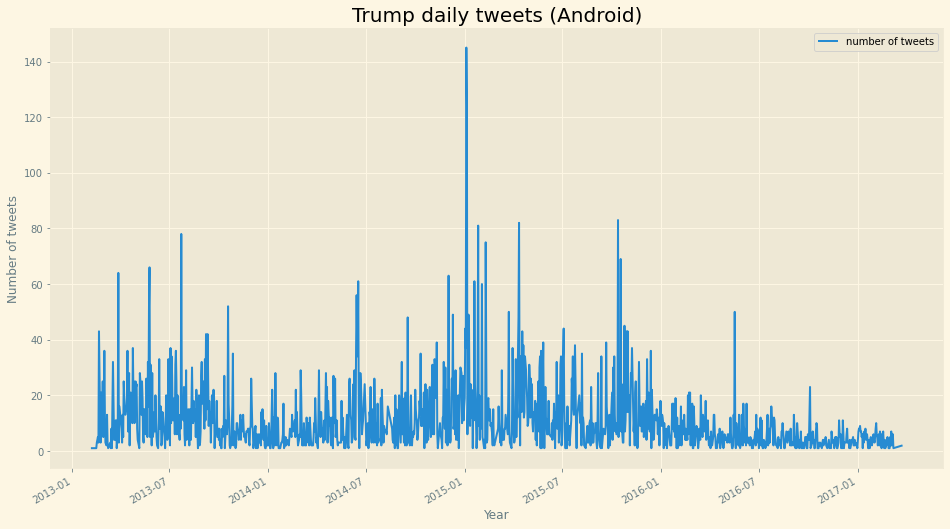

In [231]:
tweet_frequency_Android = pd.DataFrame(trump_tweets.loc[trump_tweets['device'] == 'Twitter for Android'].groupby('Date').size(), columns = ['number of tweets'])
# Plot the data
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('Solarize_Light2')
ax = tweet_frequency_Android.plot()
ax.set_title("Trump daily tweets (Android)", fontsize=20)
ax.set_xlabel("Year")
ax.set_ylabel("Number of tweets");

Text(0, 0.5, 'total number of tweets')

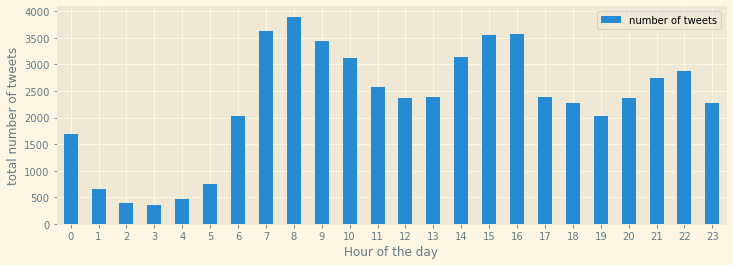

In [239]:
fig, axs = plt.subplots(figsize=(12, 4))
tweet_hours = pd.DataFrame(trump_tweets.groupby(trump_tweets["EST"].dt.hour).size(), columns = ['number of tweets']).plot(
    kind='bar', rot=0, ax=axs)
plt.xlabel("Hour of the day");  # custom x label using matplotlib
plt.ylabel("total number of tweets")

In [252]:
pd.DataFrame(trump_tweets.groupby(trump_tweets["EST"].dt.hour).size())

,0
EST,
0,1691
1,647
2,401
3,352
4,461
5,746
6,2038
7,3639
8,3899
